# 🔎 Principal Component Analysis (PCA)

## 1. Introduction
**Principal Component Analysis (PCA)** is one of the most widely used techniques in **dimensionality reduction**.  
It transforms high-dimensional data into a smaller number of dimensions while keeping most of the important information.  

### Why PCA?
- Many datasets contain **redundant or correlated features**.  
- High-dimensional data increases **computational cost** and may cause the **curse of dimensionality**.  
- PCA projects data onto fewer dimensions → simpler, faster, less noisy.  

---

## 2. Applications of PCA
- **Data Visualization** → Reduce data to 2D/3D for plotting.  
- **Noise Reduction** → Removes less-informative components.  
- **Preprocessing** → Before machine learning models.  
- **Compression** → Store less data while retaining key patterns.  
- **Face Recognition** → Eigenfaces method.  

---

## 3. How PCA Works (Step by Step)
1. **Standardize the Data**  
   Ensure each feature has mean = 0 and variance = 1.  

2. **Compute the Covariance Matrix**  
   Captures relationships between features:  
   $$
   C = \frac{1}{n-1} X^T X
   $$

3. **Find Eigenvalues and Eigenvectors**  
   - Eigenvectors → directions of maximum variance (principal components).  
   - Eigenvalues → how much variance each principal component explains.  

4. **Sort and Select Components**  
   Choose top-k components with largest eigenvalues.  

5. **Transform Data**  
   Project data onto new feature space:  
   \[
   Z = X W
   \]  
   where \(W\) contains selected eigenvectors.  

---

## 4. Kernel PCA
PCA works well for **linear patterns**, but real-world data often has **non-linear structures**.  

**Kernel PCA (kPCA):**
- Uses the **kernel trick** to project data into a higher-dimensional space.  
- Then applies PCA in that space → captures non-linear relationships.  

### Common Kernels
- **Linear** → same as standard PCA.  
- **Polynomial** → maps data into polynomial features.  
- **RBF (Gaussian)** → captures complex, curved structures.  

---

## 5. Example of Kernel PCA
- Standard PCA: Can only find **straight-line projections**.  
- Kernel PCA with **RBF kernel**: Can unfold curved manifolds (e.g., separating concentric circles).  

---

## 6. Key Insight
- **PCA**: Best for reducing dimensions when data is mostly linear.  
- **Kernel PCA**: Extends PCA for **non-linear datasets** using kernel functions.  
- Choosing the right kernel is critical for performance.  


# Example: Applying PCA

Suppose we have the following 2D dataset (2 features: \(x_1, x_2\)):

| Sample | x1      | x2      |
|--------|---------|---------|
| 1      | 2.5     | 2.4     |
| 2      | 0.5     | 0.7     |
| 3      | 2.2     | 2.9     |
| 4      | 1.9     | 2.2     |
| 5      | 3.1     | 3.0     |

---

## Step 1: Standardize the data
Compute mean of each feature:  
$$
\mu_{x_1} = 2.04, \quad \mu_{x_2} = 2.24
$$

Subtract mean from each column → centered data:

| Sample | x1                  | x2                  |
|--------|---------------------|---------------------|
| 1      | 0.46                | 0.16                |
| 2      | -1.54               | -1.54               |
| 3      | 0.16                | 0.66                |
| 4      | -0.14               | -0.04               |
| 5      | 1.06                | 0.76                |

---

## Step 2: Covariance matrix
$$
C = \frac{1}{n-1} X^T X =
\begin{bmatrix}
0.616 & 0.615 \\
0.615 & 0.716
\end{bmatrix}
$$

---

## Step 3: Eigen decomposition
Solve $$\det(C - \lambda I) = 0\$$.  

Eigenvalues:  
$$
\lambda_1 = 1.284, \quad \lambda_2 = 0.049
$$

Eigenvectors:  
$$
v_1 = \begin{bmatrix} -0.677 \\ -0.736 \end{bmatrix}, \quad
v_2 = \begin{bmatrix} -0.736 \\ 0.677 \end{bmatrix}
$$

---

## Step 4: Select principal component
-$$\lambda_1$$ explains **96%** of variance → choose \(v_1\) as the first principal component.  

---

## Step 5: Transform data
Project original data onto \(v_1\):  

$$
Z = X \cdot v_1
$$

New 1D values (reduced representation):  
$$
Z = [ -0.827, \; 1.777, \; -0.992, \; -0.274, \; -1.673 ]
$$

---

The 2D dataset is now represented in **1D** while keeping most variance.  
This is the essence of **PCA** → reduce dimensionality while preserving important information.


# Example to show the effect  of PCA

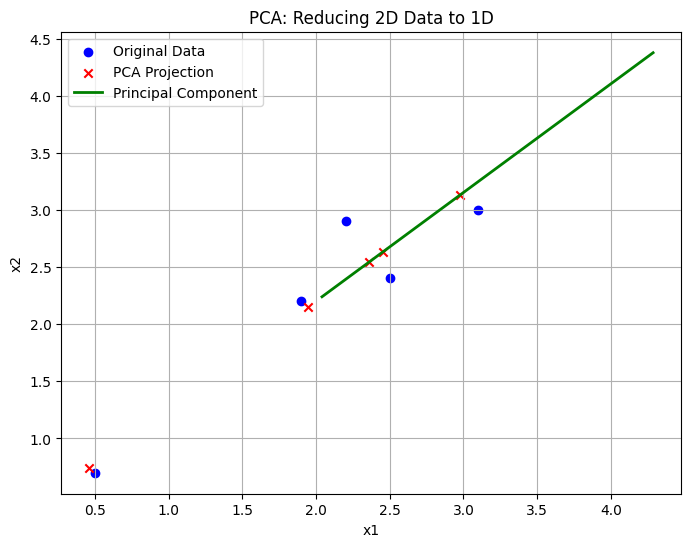

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Original 2D data
X = np.array([
    [2.5, 2.4],
    [0.5, 0.7],
    [2.2, 2.9],
    [1.9, 2.2],
    [3.1, 3.0]
])

# Apply PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)
X_reconstructed = pca.inverse_transform(X_pca)

# Plot original data
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c='blue', label="Original Data")
plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1], c='red', label="PCA Projection", marker='x')

# Plot the principal component line
vector = pca.components_[0] * max(X[:,0])
origin = np.mean(X, axis=0)
plt.plot([origin[0], origin[0]+vector[0]], [origin[1], origin[1]+vector[1]], color='green', linewidth=2, label="Principal Component")

plt.xlabel("x1")
plt.ylabel("x2")
plt.title("PCA: Reducing 2D Data to 1D")
plt.legend()
plt.grid(True)
plt.show()


# Model using PCA AND Kernal PCA

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
dataset = pd.read_csv('/content/drive/MyDrive/data/Wine.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
classifier_pca = LogisticRegression(random_state = 0)
classifier_pca.fit(X_train_pca, y_train)

LogisticRegression(random_state=0)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_pca.predict(X_test_pca)
cm_pca = confusion_matrix(y_test, y_pred)
print(cm_pca)
accuracy_score(y_test, y_pred)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


0.9722222222222222

/tmp/ipython-input-698402413.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


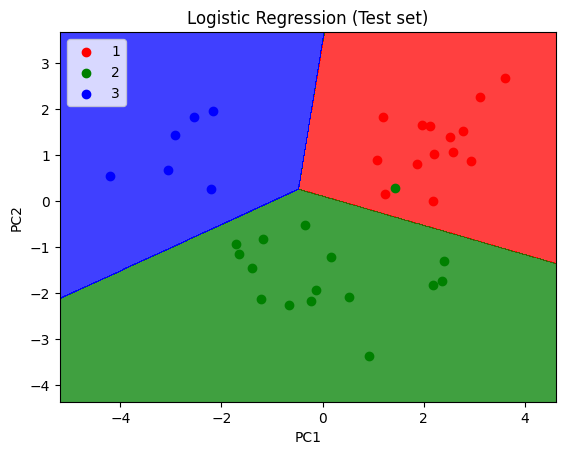

In [30]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_pca, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_pca.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [26]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train_k = kpca.fit_transform(X_train)
X_test_k = kpca.transform(X_test)

In [27]:
from sklearn.linear_model import LogisticRegression
classifier_kernal = LogisticRegression(random_state = 0)
classifier_kernal.fit(X_train_k, y_train)

LogisticRegression(random_state=0)

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred_k = classifier_kernal.predict(X_test_k)
cm_k = confusion_matrix(y_test, y_pred_k)
print(cm_k)
accuracy_score(y_test, y_pred_k)

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


1.0

/tmp/ipython-input-3520764776.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


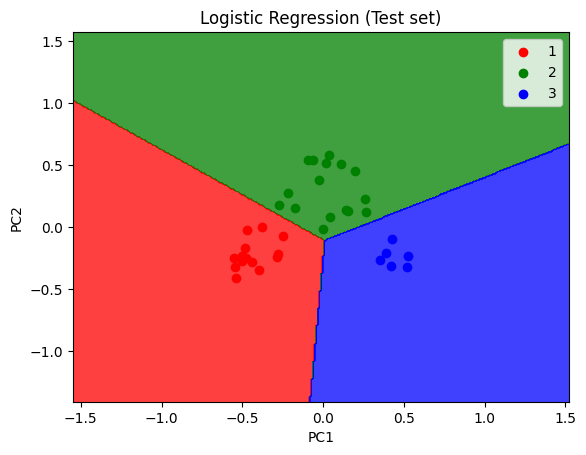

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_k, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier_kernal.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()